<a href="https://colab.research.google.com/github/jothir2022-lgtm/Qiskit-two-qubit-tensor-product/blob/main/Sentiment%20Movie%20Review%20Analysis%20Using_NLP%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Training and Testing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import pandas as pd

df = pd.read_csv(
    "/content/IMDB Dataset.csv",
    engine="python",
    on_bad_lines="skip"
)

print("\nOriginal Data: ", df.head(5))
print("\nOriginal Data Shape: ", df.shape)


Original Data:                                                review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Original Data Shape:  (6270, 2)


In [3]:
#check for null values
from sklearn.preprocessing import LabelEncoder

print(df.isnull().sum())

#convert sentiment to numeric
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment']) #0 for negative and 1 for positive
print("\nAfter Encoding")
print(df.head(5))

#shuffle the dataframe
df=df.sample(frac=1).reset_index(drop=True)

review       0
sentiment    0
dtype: int64

After Encoding
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [ ]:
#Data Preprocessing (Tokenization + Stopwords removal + Lemmatization)

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Convert text to string
df['review'] = df['review'].astype(str)

In [6]:
# Before preprocessing print data
print("\nBefore Preprocessing")
print(df.head(5))


Before Preprocessing
                                              review  sentiment
0  'Don't Look In the Basement' is so easy to kno...          1
1  As a native Chinese, I can not accept this kin...          0
2  DANIEL DAY-LEWIS does a remarkable job of play...          1
3  This film is probably the worst movie I have w...          0
4  I can't get this flick off my brain. It's defi...          1


In [7]:
# Text preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation, numbers, and special characters (keep only letters)
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into string
    return " ".join(tokens)

# Apply preprocessing
df['review'] = df['review'].apply(preprocess_text)

# After preprocessing print data
print("\nAfter Preprocessing")
print(df.head(10))



After Preprocessing
                                              review  sentiment
0  look basement easy knock truth simply brownrig...          1
1  native chinese accept kind idea people must di...          0
2  daniel day lewis remarkable job playing christ...          1
3  film probably worst movie watched long time ac...          0
4  get flick brain definitely totally different a...          1
5  watched movie first time ever sci fi channel m...          1
6  best movie ever movie broke rib force laughter...          1
7  like think fairly open minded guy take lot dis...          0
8  jessica ghost story name implies ghost story t...          0
9  script weak w enough character arc make care o...          0


In [ ]:
#Feature Extraction & Model NaveBayes Prediction

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# features and target
X = df['review']
y = df['sentiment']

# convert text into numerical features
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.3, random_state=42)

# Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
print("Model: Naive Bayes\n")
print("-> News is predicted as:", y_pred[:10])

# ---- Metrics evaluation ----
nb_acc = accuracy_score(y_test, y_pred)
nb_pre = precision_score(y_test, y_pred, average='weighted')
nb_rec = recall_score(y_test, y_pred, average='weighted')
nb_f1  = f1_score(y_test, y_pred, average='weighted')
nb_cm  = confusion_matrix(y_test, y_pred)

# Handle ROC-AUC safely
try:
    if len(np.unique(y)) == 2:
        nb_roc = roc_auc_score(y_test, y_pred)
    else:
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        y_pred_bin = label_binarize(y_pred, classes=np.unique(y))
        nb_roc = roc_auc_score(y_test_bin, y_pred_bin, average='weighted', multi_class='ovr')
except Exception as e:
    nb_roc = f"ROC-AUC not applicable: {e}"

# ---- Results ----
print("\n============ Model Performance =============\n")
print("Accuracy:", nb_acc)
print("Precision:", nb_pre)
print("Recall:", nb_rec)
print("F1-Score:", nb_f1)
print("Confusion Matrix:\n", nb_cm)
print("ROC-AUC:", nb_roc)


Model: Naive Bayes

-> News is predicted as: [0 0 1 1 1 1 0 1 0 0]

============ Model Performance =============

Accuracy: 0.8373205741626795
Precision: 0.8394151922190383
Recall: 0.8373205741626795
F1-Score: 0.8370649870112966
Confusion Matrix:
 [[825 116]
 [190 750]]
ROC-AUC: 0.8372996133583558


In [ ]:
#Logistic Regression Prediction

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize
import numpy as np

# ----- Step 1: Features and Target -----
X = df['review']
y = df['sentiment']

# ----- Step 2: TF-IDF Vectorization (faster & better than CountVectorizer) -----
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# ----- Step 3: Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# ----- Step 4: Logistic Regression -----
reg = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1)
reg.fit(X_train, y_train)

# ----- Step 5: Prediction -----
reg_pred = reg.predict(X_test)
print("Model: Logistic Regression\n")
print("-> News is predicted as:", reg_pred[:10])

# ----- Step 6: Metrics Evaluation -----
lr_acc = accuracy_score(y_test, reg_pred)
lr_pre = precision_score(y_test, reg_pred, average='weighted')
lr_rec = recall_score(y_test, reg_pred, average='weighted')
lr_f1  = f1_score(y_test, reg_pred, average='weighted')
lr_cm  = confusion_matrix(y_test, reg_pred)

# ROC-AUC handling for binary or multiclass
try:
    if len(np.unique(y)) == 2:
        lr_roc = roc_auc_score(y_test, reg_pred)
    else:
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        y_pred_bin = label_binarize(reg_pred, classes=np.unique(y))
        lr_roc = roc_auc_score(y_test_bin, y_pred_bin, average='weighted', multi_class='ovr')
except Exception as e:
    lr_roc = f"ROC-AUC not applicable: {e}"

# ----- Step 7: Results -----
print("\n============ Model Performance =============\n")
print("Accuracy:", lr_acc)
print("Precision:", lr_pre)
print("Recall:", lr_rec)
print("F1-Score:", lr_f1)
print("Confusion Matrix:\n", lr_cm)
print("ROC-AUC:", lr_roc)


Model: Logistic Regression

-> News is predicted as: [0 0 1 1 1 0 0 1 0 0]

============ Model Performance =============

Accuracy: 0.8692185007974481
Precision: 0.8693551205471424
Recall: 0.8692185007974481
F1-Score: 0.8692071891562255
Confusion Matrix:
 [[809 132]
 [114 826]]
ROC-AUC: 0.8692235512243652


In [ ]:
#SVM Predictions

In [10]:
from sklearn.svm import LinearSVC

sample_size = len(df)
df_sampled = df.sample(n=sample_size, random_state=42, replace=False)

X_sampled = df_sampled['review']
y_sampled = df_sampled['sentiment']

print(f"Working with a manageable sample of {sample_size} reviews for model comparison.")

# Convert text into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_counts = vectorizer.fit_transform(X_sampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_counts, y_sampled, test_size=0.3, random_state=42
)

# FAST SVM model for text
svm = LinearSVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Predictions
print("Model: Linear SVM")
print("First 10 predictions:", svm_pred[:10])
print("Actual first 10 labels:", y_test.values[:10])

# Metrics evaluation
svm_acc = accuracy_score(y_test, svm_pred)
svm_pre = precision_score(y_test, svm_pred)
svm_rec = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_roc = roc_auc_score(y_test, svm_pred)

print("\n============ Model Performance =============\n")
print(f"Accuracy: {svm_acc:.4f}")
print(f"Precision: {svm_pre:.4f}")
print(f"Recall: {svm_rec:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print("Confusion Matrix:\n", svm_cm)
print(f"ROC-AUC: {svm_roc:.4f}")

# Additional useful info
print("\nAdditional Info:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")


Working with a manageable sample of 6270 reviews for model comparison.
Model: Linear SVM
First 10 predictions: [1 0 1 1 0 0 0 0 1 1]
Actual first 10 labels: [0 0 1 1 0 0 0 0 0 1]

============ Model Performance =============

Accuracy: 0.8522
Precision: 0.8518
Recall: 0.8518
F1-Score: 0.8518
Confusion Matrix:
 [[804 139]
 [139 799]]
ROC-AUC: 0.8522

Additional Info:
Training samples: 4389
Testing samples: 1881
Number of features: 5000


In [ ]:
#Comparison of all Models and choose the best one

In [11]:
results=pd.DataFrame({

    'Model':['Nave Bayes','Logistic Regression','Support Vector Machine'],
    'Accuracy':[nb_acc,lr_acc,svm_acc],
    'Precision':[nb_pre,lr_pre,svm_pre],
    'Recall':[nb_rec,lr_rec,svm_rec],
    'F1-Score':[nb_f1,lr_f1,svm_f1],
    'Confusion Matrix':[nb_cm,lr_cm,svm_cm],
    'ROC-AUC':[nb_roc,lr_roc,svm_roc]

})

print("Model Comparison Table")
print(results.to_string())

# Rank models based on metrics (lower rank = better)
metrics_to_rank = ["Accuracy", "F1-Score", "ROC-AUC"]
for metric in metrics_to_rank:
    results[f"{metric}_Rank"] = results[metric].rank(ascending=False)

# Calculate overall rank
results["Overall_Rank"] = results[[f"{m}_Rank" for m in metrics_to_rank]].sum(axis=1)

# Sort by overall rank
results_sorted = results.sort_values("Overall_Rank")
print("\nRanked Models")
print(results_sorted.to_string())

# Select best model
best_model = results_sorted.iloc[0]["Model"]
print("\nBest Model Selected:", best_model)

Model Comparison Table
                    Model  Accuracy  Precision    Recall  F1-Score          Confusion Matrix   ROC-AUC
0              Nave Bayes  0.837321   0.839415  0.837321  0.837065  [[825, 116], [190, 750]]  0.837300
1     Logistic Regression  0.869219   0.869355  0.869219  0.869207  [[809, 132], [114, 826]]  0.869224
2  Support Vector Machine  0.852206   0.851812  0.851812  0.851812  [[804, 139], [139, 799]]  0.852205

Ranked Models
                    Model  Accuracy  Precision    Recall  F1-Score          Confusion Matrix   ROC-AUC  Accuracy_Rank  F1-Score_Rank  ROC-AUC_Rank  Overall_Rank
1     Logistic Regression  0.869219   0.869355  0.869219  0.869207  [[809, 132], [114, 826]]  0.869224            1.0            1.0           1.0           3.0
2  Support Vector Machine  0.852206   0.851812  0.851812  0.851812  [[804, 139], [139, 799]]  0.852205            2.0            2.0           2.0           6.0
0              Nave Bayes  0.837321   0.839415  0.837321  0.837065 

In [ ]:
#Visualizations
#Confusion Matrix (According to SYM) for Best Model Accuracy

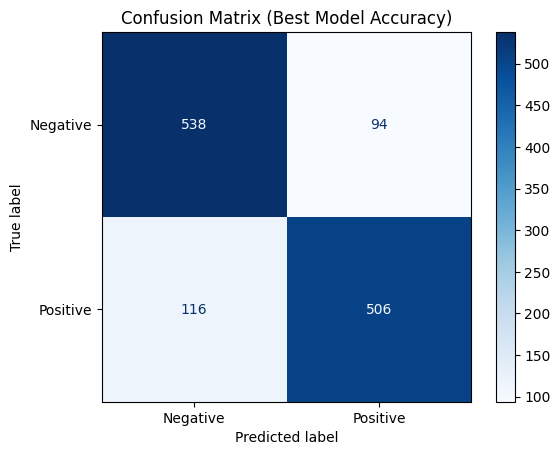

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 1. Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# 2. Convert text data into numeric features
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 3. Train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 4. Make predictions on test set
y_pred = model.predict(X_test_vec)

# 5". Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (Best Model Accuracy)")
plt.show()


In [ ]:
#Wordcloud for Positive/Negative Reviews

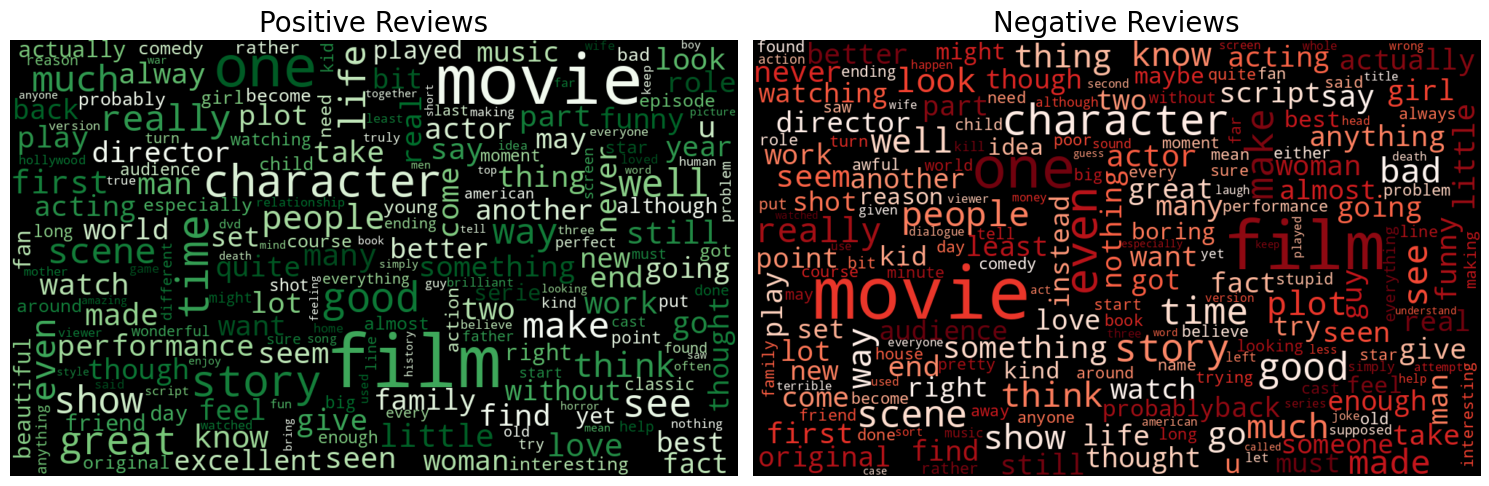

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and 'sentiment' column has 1 for positive and 0 for negative
# and 'review' column has the review text

# Positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['review'].astype(str))

# Negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 0]['review'].astype(str))

# Create WordClouds
positive_wordcloud = WordCloud(height=600, width=1000, max_font_size=100, colormap='Greens').generate(positive_reviews)
negative_wordcloud = WordCloud(height=600, width=1000, max_font_size=100, colormap='Reds').generate(negative_reviews)

# Plotting
plt.figure(figsize=(15,12))

# Positive reviews wordcloud
plt.subplot(1,2,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews", fontsize=20)

# Negative reviews wordcloud
plt.subplot(1,2,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews", fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
#Histogram – Review Length Distribution (Positive vs Negative Reviews)

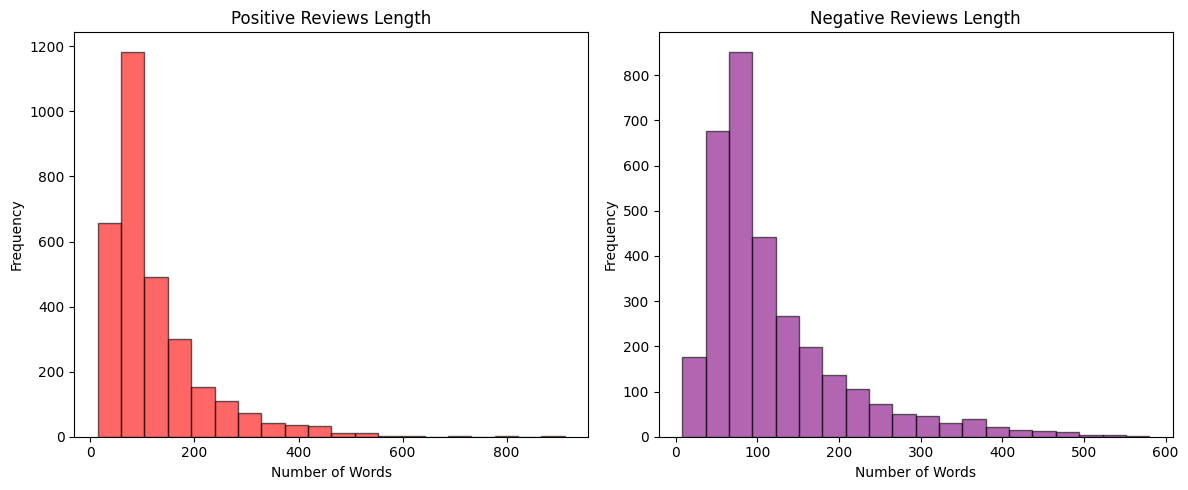

In [15]:
# Calculate review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Separate lengths by sentiment
pos_lengths = df[df['sentiment']==1]['review_length']
neg_lengths = df[df['sentiment']==0]['review_length']

# Plot side-by-side histograms
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(pos_lengths, bins=20, color='red', alpha=0.6, edgecolor='black')
plt.title('Positive Reviews Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(neg_lengths, bins=20, color='purple', alpha=0.6, edgecolor='black')
plt.title('Negative Reviews Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
#Distribution of Review Length vs Word Count Categories

#Histogram


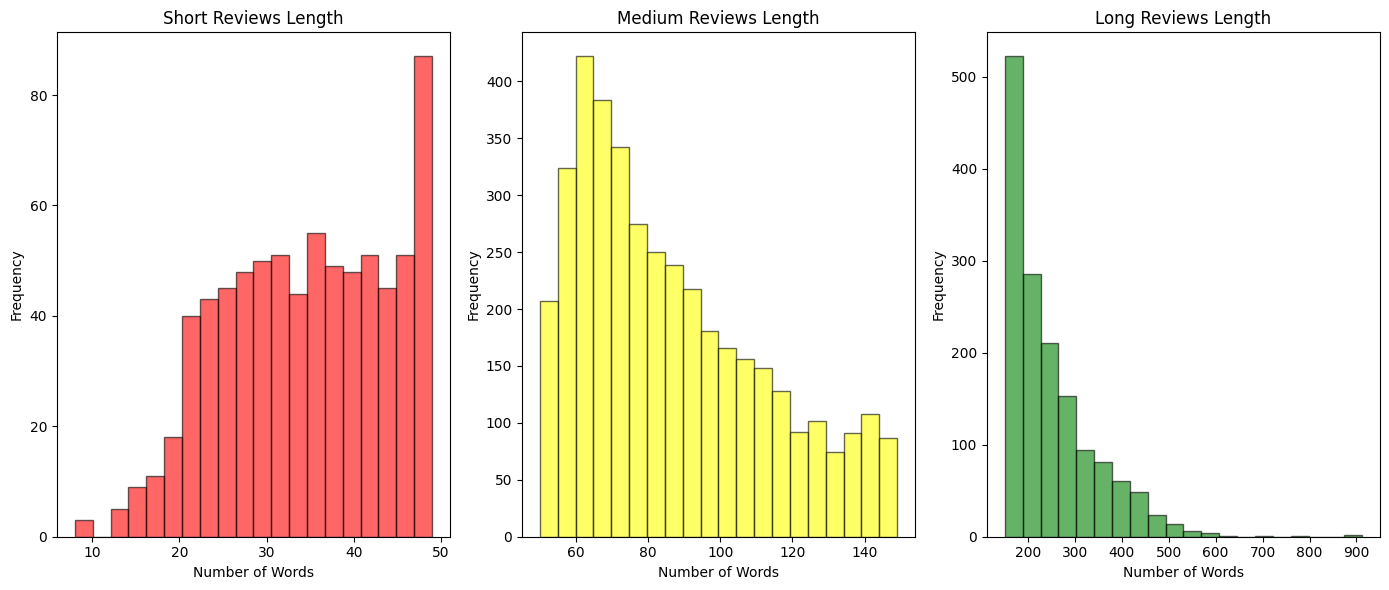

In [16]:
# Calculate review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
df['short_review'] = df['review_length'].apply(lambda x: True if x < 50 else False)
df['medium_review']= df['review_length'].apply(lambda x: True if x >= 50 and x < 150 else False)
df['long_review'] = df['review_length'].apply(lambda x: True if x > 150 else False)

#subplots for each review
plt.figure(figsize=(14,6))

#subplot for short reviews
plt.subplot(1,3,1)
plt.hist(df[df['short_review'] == True]['review_length'], bins=20, color='red', alpha=0.6, edgecolor='black')
plt.title('Short Reviews Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

#subplot for medium reviews
plt.subplot(1,3,2)
plt.hist(df[df['medium_review']==True]['review_length'],bins=20,color='yellow',alpha=0.6,edgecolor='black')
plt.title('Medium Reviews Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

#subplot for long reviews
plt.subplot(1,3,3)
plt.hist(df[df['long_review'] == True]['review_length'], bins=20, color='green', alpha=0.6, edgecolor='black')
plt.title('Long Reviews Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#Bar Char

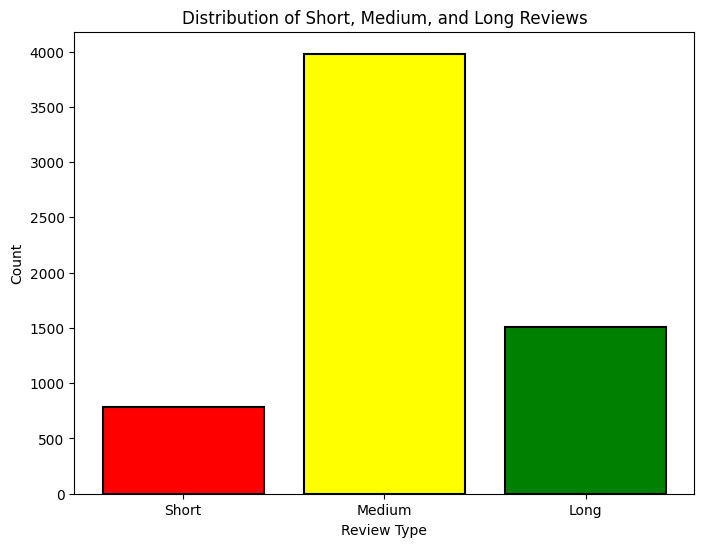

In [17]:
# Review length categories
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
df['review_type'] = pd.cut(df['review_length'],
                           bins=[0, 50, 150, float('inf')],
                           labels=['Short', 'Medium', 'Long'])

# Count values for each category
counts = df['review_type'].value_counts().reindex(['Short', 'Medium', 'Long'])

# Bar chart with border
plt.figure(figsize=(8,6))
bars = plt.bar(counts.index, counts.values,
               color=['red', 'yellow', 'green'],
               edgecolor='black', linewidth=1.5)

plt.title('Distribution of Short, Medium, and Long Reviews')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()

# CONNECTING TO STREAMLIT

In [18]:
!pip install streamlit -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.7 MB/s eta 0:00:00


In [19]:
!wget -q -o - ipv4.icanhazip.com

In [20]:
%%writefile app.py

Writing app.py


In [21]:
!pip install --upgrade streamlit

In [22]:
!pip install streamlit pyngrok

In [23]:
!streamlit run app.py --server.port 8501 &> /dev/null &

In [24]:
!streamlit run app.py --server.port 8501 --server.headless true > log.txt 2>&1 &


In [25]:
!pip install -q streamlit pyngrok nltk scikit-learn matplotlib pandas wordcloud

import os
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from pyngrok import ngrok
from wordcloud import WordCloud
import html

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

CSV_PATH = "/content/IMDB Dataset.csv"
if not os.path.exists(CSV_PATH):
    print(f"Dataset not found at {CSV_PATH}. Upload CSV to Colab or change path.")
else:
    df = pd.read_csv(CSV_PATH, engine="python", on_bad_lines="skip", quotechar='"', escapechar="\\", encoding="utf-8")
    df.dropna(subset=['review','sentiment'], inplace=True)
    df = df[['review','sentiment']].reset_index(drop=True)

emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"
         u"\U0001F300-\U0001F5FF"
         u"\U0001F680-\U0001F6FF"
         u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
_contractions = {
    "won't": "will not", "can't": "can not", "n't": " not", "'re": " are",
    "'s": " is", "'d": " would", "'ll": " will", "'t": " not", "'ve": " have",
    "'m": " am"
}

stop_words_default = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def expand_contractions(text):
    for c, r in _contractions.items():
        text = text.replace(c, r)
    return text

def full_clean_text(text, remove_stopwords=True, apply_lemmatize=True, apply_stem=False):
    if text is None:
        return ""
    text = str(text).lower()
    text = expand_contractions(text)
    text = html.unescape(text)
    text = re.sub(r"<.*?>", " ", text)
    text = emoji_pattern.sub(" ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    words = text.split()
    if remove_stopwords:
        words = [w for w in words if w not in stop_words_default]
    if apply_lemmatize:
        words = [lemmatizer.lemmatize(w) for w in words]
    if apply_stem:
        words = [stemmer.stem(w) for w in words]
    return " ".join(words).strip()

# Preprocess dataset if not already done
if not os.path.exists("preprocessed_dataset.csv"):
    df['clean_review'] = df['review'].apply(lambda t: full_clean_text(t))
    df.to_csv("preprocessed_dataset.csv", index=False)
else:
    df = pd.read_csv("preprocessed_dataset.csv")


# 6) Train models if not exists
MODEL_FILES = {
    "LogisticRegression": "LogisticRegression.pkl",
    "NaiveBayes": "NaiveBayes.pkl",
    "LinearSVM": "LinearSVM.pkl",
    "RandomForest": "RandomForest.pkl"
}
VECT_MAX_FEATURES = 2000
tfidf = TfidfVectorizer(max_features=VECT_MAX_FEATURES)
countv = CountVectorizer(max_features=VECT_MAX_FEATURES)

if not all([os.path.exists(f) for f in MODEL_FILES.values()]):
    X = df['clean_review']
    y = df['sentiment'].map({'positive':1,'negative':0})
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    countv.fit(X_train)
    models = {
        "LogisticRegression": LogisticRegression(max_iter=500),
        "NaiveBayes": MultinomialNB(),
        "LinearSVM": LinearSVC(max_iter=5000),
        "RandomForest": RandomForestClassifier(n_estimators=50, random_state=42)
    }
    trained_models = {}
    results = {}
    for name, m in models.items():
        if not hasattr(m, "predict_proba"):
            m = CalibratedClassifierCV(m, cv=3)
        m.fit(X_train_tfidf, y_train)
        y_pred = m.predict(X_test_tfidf)
        results[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred)
        }
        trained_models[name] = m
        pickle.dump(m, open(f"{name}.pkl","wb"))
    pickle.dump(tfidf, open("tfidf_vectorizer.pkl","wb"))
    pickle.dump(countv, open("count_vectorizer.pkl","wb"))
    pd.DataFrame(results).T.to_csv("model_results.csv")
else:
    tfidf = pickle.load(open("tfidf_vectorizer.pkl","rb"))
    countv = pickle.load(open("count_vectorizer.pkl","rb"))

# 7) Streamlit App
streamlit_app = r'''
import streamlit as st
import pickle, pandas as pd, re, os, html, numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

tfidf = pickle.load(open("tfidf_vectorizer.pkl","rb"))
countv = pickle.load(open("count_vectorizer.pkl","rb"))
MODEL_FILES = {
    "LogisticRegression": "LogisticRegression.pkl",
    "NaiveBayes": "NaiveBayes.pkl",
    "LinearSVM": "LinearSVM.pkl",
    "RandomForest": "RandomForest.pkl"
}
results_df = pd.read_csv("model_results.csv", index_col=0)
df = pd.read_csv("preprocessed_dataset.csv")

stop_words_default = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"
         u"\U0001F300-\U0001F5FF"
         u"\U0001F680-\U0001F6FF"
         u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
_contractions = {"won't": "will not", "can't": "can not", "n't": " not", "'re": " are",
                 "'s": " is", "'d": " would", "'ll": " will", "'t": " not", "'ve": " have",
                 "'m": " am"}

def expand_contractions(text):
    for c,r in _contractions.items(): text = text.replace(c,r)
    return text

def full_clean_text(text, remove_stopwords=True, apply_lemmatize=True, apply_stem=False):
    if text is None: return ""
    text = str(text).lower()
    text = expand_contractions(text)
    text = html.unescape(text)
    text = re.sub(r"<.*?>"," ",text)
    text = emoji_pattern.sub(" ",text)
    text = re.sub(r"[^a-zA-Z\s]"," ",text)
    words = text.split()
    if remove_stopwords: words = [w for w in words if w not in stop_words_default]
    if apply_lemmatize: words = [lemmatizer.lemmatize(w) for w in words]
    if apply_stem: words = [stemmer.stem(w) for w in words]
    return " ".join(words).strip()

def explain_prediction(model, vec, processed, vector_choice):
    words = [w for w in processed.split() if w in (tfidf if vector_choice=="TF-IDF" else countv).vocabulary_]
    if not words:
        return "No words in the model vocabulary."

    vectorizer = tfidf if vector_choice=="TF-IDF" else countv
    explanation = ""

    # Logistic Regression / SVM
    if hasattr(model, "coef_"):
        coefs = model.coef_[0]
        word_scores = {w: coefs[vectorizer.vocabulary_[w]] for w in words}
        pos_words = sorted({k:v for k,v in word_scores.items() if v>0}.items(), key=lambda x:-x[1])[:5]
        neg_words = sorted({k:-v for k,v in word_scores.items() if v<0}.items(), key=lambda x:-x[1])[:5]
        explanation += "Top words supporting predicted sentiment:\n"
        for w,v in pos_words:
            explanation += f"{w}: +{v:.4f}\n"
        if neg_words:
            explanation += "\nTop words supporting opposite sentiment:\n"
            for w,v in neg_words:
                explanation += f"{w}: -{v:.4f}\n"

    # Naive Bayes
    elif hasattr(model,"feature_log_prob_"):
        idx = [vectorizer.vocabulary_[w] for w in words]
        pos_scores = model.feature_log_prob_[1][idx]
        neg_scores = model.feature_log_prob_[0][idx]
        word_scores = dict(zip(words, pos_scores - neg_scores))
        pos_words = sorted({k:v for k,v in word_scores.items() if v>0}.items(), key=lambda x:-x[1])[:5]
        neg_words = sorted({k:-v for k,v in word_scores.items() if v<0}.items(), key=lambda x:-x[1])[:5]
        explanation += "Top words supporting predicted sentiment:\n"
        for w,v in pos_words:
            explanation += f"{w}: +{v:.4f}\n"
        if neg_words:
            explanation += "\nTop words supporting opposite sentiment:\n"
            for w,v in neg_words:
                explanation += f"{w}: -{v:.4f}\n"

    missing_words = [w for w in processed.split() if w not in words]
    if missing_words:
        explanation += "\nWords ignored: " + ", ".join(missing_words)

    return explanation


# Streamlit UI

st.set_page_config(page_title="IMDB Sentiment Analysis", layout="wide")
st.title("IMDB Sentiment Analysis")

st.sidebar.header("Settings")
dark_mode = st.sidebar.checkbox("Dark Mode", True)
model_choice = st.sidebar.selectbox("Choose Model", list(MODEL_FILES.keys()))
vector_choice = st.sidebar.radio("Vectorizer", ("TF-IDF","CountVectorizer"))
stopwords_toggle = st.sidebar.checkbox("Remove Stopwords", True)
lemmatize_toggle = st.sidebar.checkbox("Lemmatize", True)
stem_toggle = st.sidebar.checkbox("Stemming", False)
show_preprocessed = st.sidebar.checkbox("Show Preprocessed Text", True)
show_dataset = st.sidebar.button("Show Dataset")
show_wordcloud = st.sidebar.button("Show WordCloud")

if dark_mode:
    st.markdown("""
    <style>
    .stApp, .block-container {background-color:#0E1117 !important; color:white !important;}
    textarea, input, select {background-color:#222831 !important; color:white !important; font-size:20px !important;}
    .stButton>button {background-color:#4CAF50 !important; color:white !important; border-radius:8px; font-size:18px !important;}
    .stDataFrame, .stTable {background-color:#11141A !important; color:white !important; font-size:16px !important;}
    </style>
    """, unsafe_allow_html=True)

st.sidebar.markdown("### Model Accuracy")
st.sidebar.dataframe(results_df.style.format("{:.3f}"))

review = st.text_area("Enter a movie review:", height=150)

if show_preprocessed and review.strip()!="":
    processed = full_clean_text(review, stopwords_toggle, lemmatize_toggle, stem_toggle)
    st.markdown("**Preprocessed Text:**")
    st.code(processed)

model_file = MODEL_FILES[model_choice]
if os.path.exists(model_file):
    model = pickle.load(open(model_file,"rb"))
else:
    st.error(f"Model file {model_file} not found.")
    model = None

# Prediction
if st.button("Predict") and review.strip()!="":
    processed = full_clean_text(review, stopwords_toggle, lemmatize_toggle, stem_toggle)
    vec = tfidf.transform([processed]) if vector_choice=="TF-IDF" else countv.transform([processed])

    pred = model.predict(vec)[0]
    sentiment = "Positive" if pred==1 else "Negative"
    emoji_icon = "🙂" if pred==1 else "😞"

    try:
        proba = model.predict_proba(vec)[0]
    except AttributeError:
        if hasattr(model, "decision_function"):
            decision = model.decision_function(vec)
            proba_pos = 1 / (1 + np.exp(-decision))
            proba = np.array([1-proba_pos[0], proba_pos[0]])
        else:
            proba = np.array([0.5,0.5])

    pos_pct = proba[1]*100
    neg_pct = proba[0]*100

    st.markdown(
        f"<div style='padding:20px;border-radius:12px;background-color:{'#4CAF50' if pred==1 else '#F44336'};"
        f"color:white;font-size:28px;font-weight:bold;text-align:center'>{emoji_icon} Prediction: {sentiment}</div>",
        unsafe_allow_html=True
    )

    st.subheader("Prediction Confidence")
    st.bar_chart(pd.DataFrame({'Positive':[pos_pct],'Negative':[neg_pct]}))

    out_df = pd.DataFrame([{"Input": review, "Processed": processed, "Prediction": sentiment,
                            "Positive %": f"{pos_pct:.2f}%", "Negative %": f"{neg_pct:.2f}%"}])
    csv = out_df.to_csv(index=False).encode('utf-8')
    st.download_button("Download Prediction CSV", csv, file_name="prediction.csv", mime='text/csv')

    explanation = explain_prediction(model, vec, processed, vector_choice)
    st.markdown("**Explanation:**")
    st.code(explanation)

# Dataset & WordCloud
if show_dataset:
    st.markdown("---")
    st.header("Dataset Sample")
    st.dataframe(df.head(20))

if show_wordcloud:
    st.markdown("---")
    st.header("WordCloud Visualization")
    text_all = " ".join(df['clean_review'].dropna())
    wc = WordCloud(
        width=900,
        height=400,
        max_words=500,
        background_color=("black" if dark_mode else "white"),
        stopwords=stop_words_default
    ).generate(text_all)
    st.image(wc.to_array())
'''


# Save Streamlit app
with open("app.py","w",encoding="utf-8") as f:
    f.write(streamlit_app)

print("Enhanced Streamlit app saved as app.py!")


# Ngrok tunnel

NGROK_AUTH_TOKEN = "335evuF2lPUnQnzp6bSQbT15Gs4_25PmBewzmoiGjSrAxfLFt"
if NGROK_AUTH_TOKEN:
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    ngrok.kill()
    public_url = ngrok.connect(8501)
    print("Ngrok URL ->", public_url)


# Run Streamlit
get_ipython().system_raw("streamlit run app.py --server.port 8501 --server.headless true > log.txt 2>&1 &")
print("Streamlit started. Open the URL above.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Enhanced Streamlit app saved as app.py!
Ngrok URL -> NgrokTunnel: "https://paul-micronucleate-jeanelle.ngrok-free.dev" -> "http://localhost:8501"
Streamlit started. Open the URL above.
